# Coffs Harbor temperature
7/28/2017 *coffs-harbor-temp.ipynb*


## Set up

In [1]:
import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#https://stackoverflow.com/questions/11936967/text-file-parsing-with-python
def clean_data(filename):    

    inputfile = open(filename + '.txt')
    outputfile = open(filename + '.csv', 'w')
    
    outputfile.writelines('Date,Temp\n')
    for line in inputfile.readlines()[1:]:
        outputfile.writelines(','.join(line.split()).replace('99999.9', '') + '\n')        

    inputfile.close()
    outputfile.close()

In [3]:
def get_data(url, filename, force=False):
    if force or not os.path.exists(filename + '.txt'): 
        urlretrieve(url, filename + '.txt')
    if force or not os.path.exists(filename + '.csv'):
        clean_data(filename)

## Get data

In [4]:
#http://www.bom.gov.au/climate/change/acorn-sat/#tabs=Data-and-networks

minURL = 'http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.059040.daily.txt'
minFile = 'coffs-harbor-min'
get_data(minURL, minFile)

maxURL = 'http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.maxT.059040.daily.txt'
maxFile = 'coffs-harbor-max'
get_data(maxURL, maxFile)

In [5]:
minData = pd.read_csv('coffs-harbor-min.csv', index_col='Date', parse_dates=True)
maxData = pd.read_csv('coffs-harbor-max.csv', index_col='Date', parse_dates=True)
#data = pd.DataFrame.join(maxData, minData, how='outer', lsuffix='_Max', rsuffix="_Min" )
data = minData.merge(maxData, suffixes=('_Min', '_Max'), left_index=True, right_index=True)
data['Temp_Diff'] = data['Temp_Max'] - data['Temp_Min']

In [6]:
data.shape

(26504, 3)

In [7]:
data.head()

,Temp_Min,Temp_Max,Temp_Diff
Date,,,
1943-02-02,21.8,30.5,8.7
1943-02-03,21.0,29.7,8.7
1943-02-04,19.8,28.3,8.5
1943-02-05,19.8,28.2,8.4
1943-02-06,20.9,28.5,7.6


In [8]:
data.tail()

,Temp_Min,Temp_Max,Temp_Diff
Date,,,
2015-08-22,14.1,24.9,10.8
2015-08-23,12.5,26.2,13.7
2015-08-24,16.0,22.0,6.0
2015-08-25,14.3,27.6,13.3
2015-08-26,7.5,22.1,14.6


In [9]:
data.describe()

,Temp_Min,Temp_Max,Temp_Diff
count,23406.000000,23485.000000,23339.000000
mean,14.063779,23.268993,9.228587
std,5.179292,3.841212,3.533022
min,-3.200000,12.000000,0.000000
25%,10.400000,20.200000,6.600000
50%,14.800000,23.300000,8.800000
75%,18.200000,26.000000,11.600000
max,26.700000,43.300000,27.300000


## Exploratory visualisation

In [10]:
def apply_common(title=''):
    ax.set_ylim(-5,45)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('°Centrigrade')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ACBB6A7940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002ACBBB786A0>]], dtype=object)

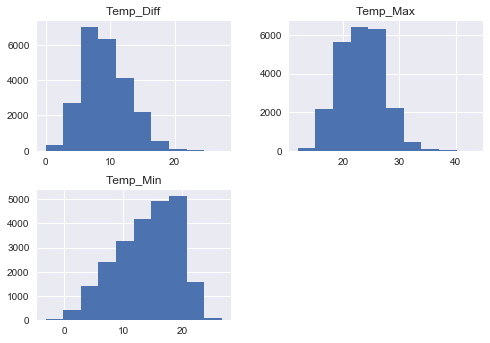

In [11]:
data.hist()

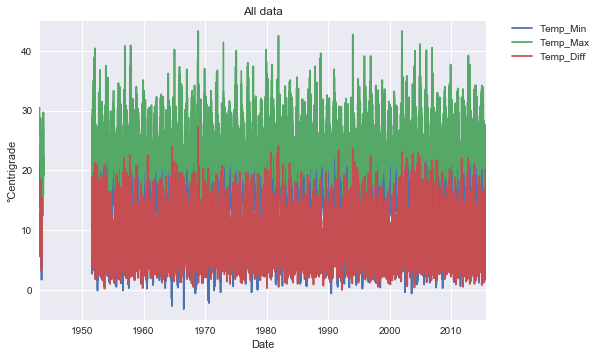

In [12]:
ax = data.plot()
apply_common('All data')

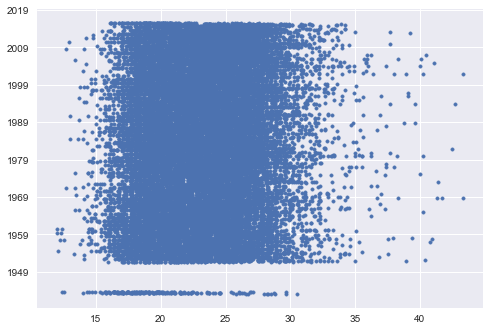

In [13]:
plt.scatter(data['Temp_Max'], data.index, marker='.')
plt.show()

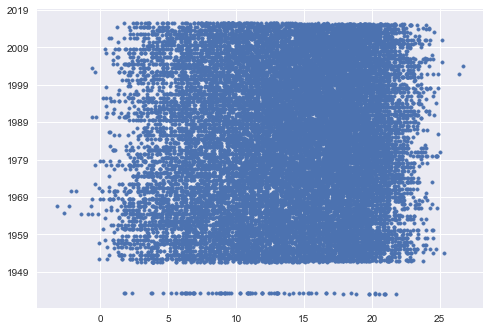

In [14]:
plt.scatter(data['Temp_Min'], data.index, marker='.')
plt.show()

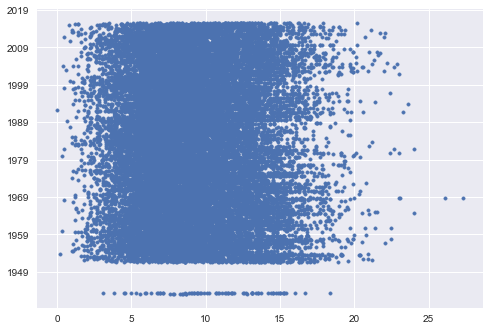

In [15]:
plt.scatter(data['Temp_Diff'], data.index, marker='.')
plt.show()

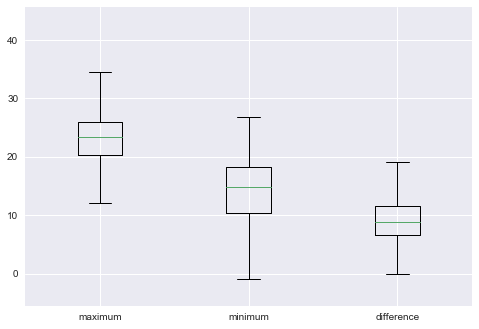

In [16]:
filtered_data = data.dropna()
boxplot_data = [filtered_data['Temp_Max'], filtered_data['Temp_Min'], filtered_data['Temp_Diff']]
plt.boxplot(boxplot_data)
plt.xticks([1, 2, 3], ['maximum', 'minimum', 'difference'])
plt.show()

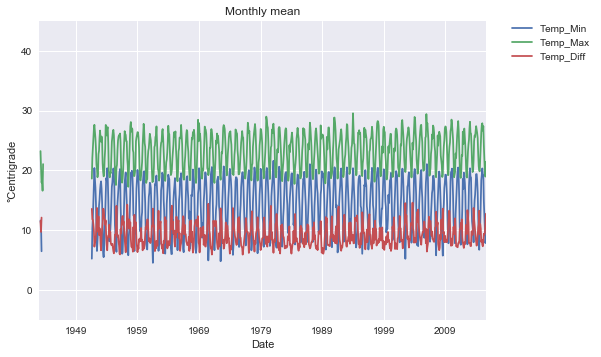

In [17]:
ax = data.resample('m').mean().plot()
apply_common('Monthly mean')

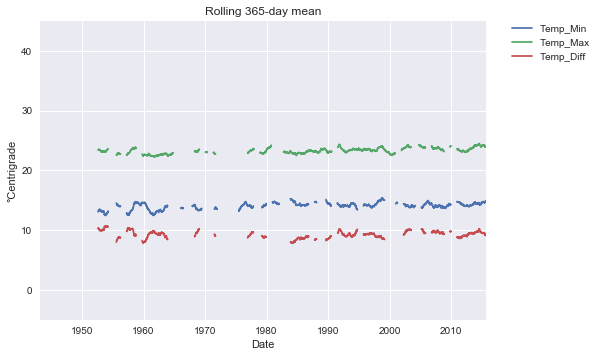

In [18]:
ax = data.resample('d').mean().rolling(365).mean().plot()
apply_common('Rolling 365-day mean')

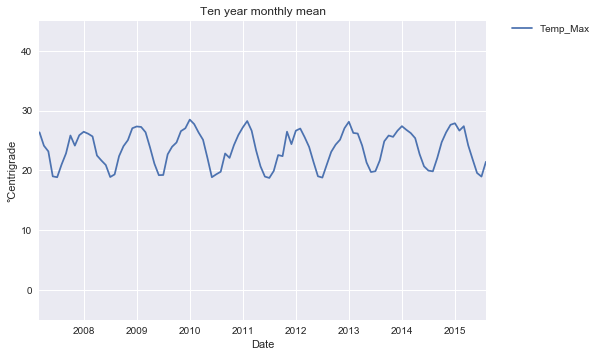

In [19]:
ax = data.loc['2007-3-1':, 'Temp_Max'].resample('m').mean().plot()
apply_common('Ten year monthly mean')

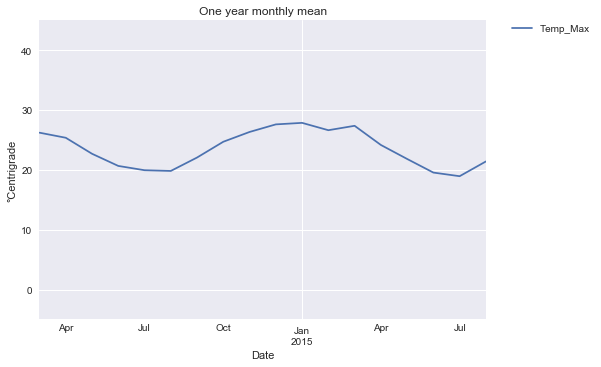

In [21]:
ax = data.loc['2014-3-1':, 'Temp_Max'].resample('m').mean().plot()
apply_common('One year monthly mean')

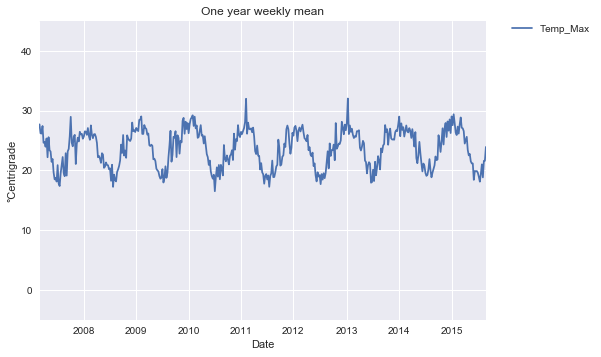

In [22]:
ax = data.loc['2007-2-28':, 'Temp_Max'].resample('w').mean().plot()
apply_common('One year weekly mean')

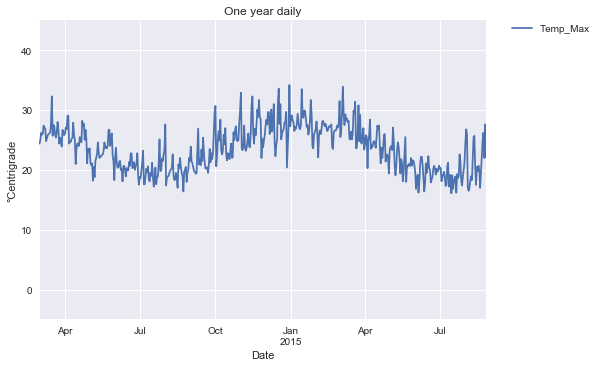

In [24]:
ax = data.loc['2014-3-1':,'Temp_Max'].plot()
apply_common('One year daily')

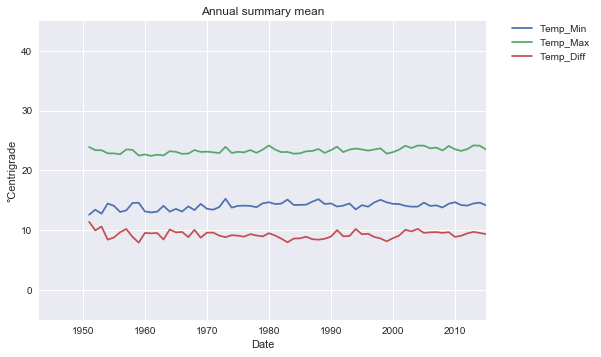

In [25]:
#https://www.kaggle.com/miguelferia/visualization-of-temperature-data
#http://benalexkeen.com/resampling-time-series-data-with-pandas/
ax = data.resample('AS').mean().plot()
apply_common('Annual summary mean')

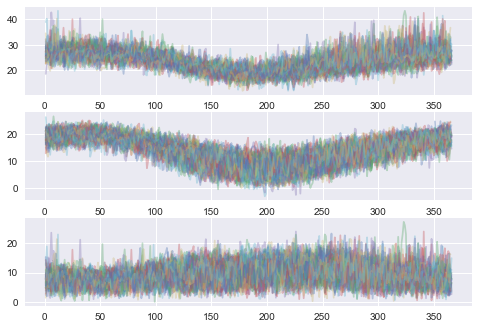

In [26]:
data['day#'] = data.index.dayofyear
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)
for key, grp in data.groupby(pd.TimeGrouper(freq='AS'), group_keys=False):
    ax1.plot(grp['day#'], grp['Temp_Max'], alpha=0.35)
    ax2.plot(grp['day#'], grp['Temp_Min'], alpha=0.35)
    ax3.plot(grp['day#'], grp['Temp_Diff'], alpha=0.35)
plt.show()